In [ ]:
# Admission problem

# Jamboree admission is a service that helps students apply to universities in abroad
# for undergraduate,graduate,MBA and Phd programs.
# Jambore offers a range of services to help the students with the application process.

# The jamboree admission center analyze the chance of admit for the students who wants to study in
# different abroad universities.Jamboree analyses the chance of admit with the help of some criteria
# like(GREScore,TOFELScore,University rating,SOP,LOR,CGPA,Research)

# Following are the attributes of the dataset
# 1.SerialNo : Each number Represents the student who applied for Jambore admission.
# 2.GREScore : Graduate Record Examination is a criteria for the admission of abroad universities.
# 3.TOFELScore : Test Of English As a Foreign Langauge is a criteria for the admission of abroad universities.
# 4.UniversityRating : Rating of the university that you are applying in abroad.
# 5.SOP : A Statement of Purpose (SOP), also known as a research statement or a letter of intent, is directed to the admission panel.
# It discusses your career path, interests, professional contributions, goals, and motivations for pursuing a specific program.
# 6.LOR : A Statement of Purpose (SOP), also known as a research statement or a letter of intent, is directed to the admission panel.
# It discusses your career path, interests, professional contributions, goals, and motivations for pursuing a specific program.
# 7.CGPA : CGPA is a calculation of the average grade point obtained in all subjects except in additional subjects as per the study scheme.
# 8.Research : Research is a criteria for the jambore admission center.
# 9.Chance of admit : percentage of chance of admission for abroad universities.

In [ ]:
# Defining Problem Statement and Analyzing Basic Metrics.

# Problem Statement:

# Student's chance of Admission for the abroad universities applied by the Jambore admission center based on GREScore,TOEFLScore,SOP,LOR,CGPA,Research.

In [ ]:
# Importing required liberaries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Reading the CSV file:
df = pd.read_csv("/content/drive/MyDrive/CSV Files/jamboree_admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


EXPLORATORY DATA ANALYSIS

In [ ]:
# Printing first few rows of data set
print("First few rows of the dataset :")
print(df.head())

# Data type of each column :-
print("Data information:\n")
print(df.info())

# Printing some last rows:
print(df.tail())
print("Last rows of dataset : ")

# Checking the numbers of rown and columns in dataset:
print("No. of rows and columns are :")
print(df.shape)

# Statistical summary like mean,standard devisation:
print("Statistical summary:\n")
print(df.describe())

# Number of unique students who applied for jambore admission:
df['Serial No.'].value_counts()

# Checking for the students which has the maximum chance to get admission.
df[df['Chance of Admit ']==df['Chance of Admit '].max()]

# Drop the unique identifier:
# df = df.drop(columns=["Serial No."])

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First few rows of the dataset :
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
Data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64 

In [ ]:
# COMMENT ON THE RANGE OF ATTRIBUTES

# 1. There are 500 rows and 9 columns
# 2. Column names are Serial No., GREScore, TOEFL Score, UniversityRating, SOP,LOR, CGPA, Research, Chance of Admit.
# 3. Serial No., GREScore, TOEFLScore, UniversityRating, Research are integer data types.
# 4. SOP,LOR,CGPA,Chance of Admit are float data types.
# 5. Statistics of the Chance of Admit column:
# 6. The Mean is               :0.721
# 7. The Standard deviation is :0.14114
# 8. Thes Minimum value is     :0.34000
# 9. The Maximum value  is     :0.97000
# 10.There are 61 unique Chance of admit for joining abroad universities.
# 11.There are only two values present in Research column 0 and 1.We are assuming that 0 represnets no researches done and 1 reprsents research done.
# 12.Maximum chance of admit was the person having was 0.97 of serial no of 23.
# 13.Minimum chance of admit was the person having was 0.34 of serial no of 93,377.
# 14.A total number of 61 unique chance of admit are there.

GRAPHICAL ANALYSIS

<Axes: xlabel='Serial No.', ylabel='count'>

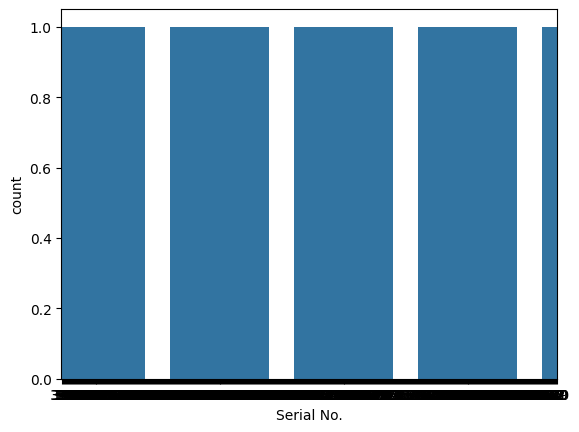

In [ ]:
# Graphical Analysis - Univariate Analysis And Bivariate Analysis :
# For Continuous variables - GRE Scores, TOEFL Scores, University Rating,
#                            SOP, LOR, GPA, Chance of Admit

sns.countplot(data = df,
              x = 'Serial No.',
              order = df['Serial No.'].value_counts().index
              )


<Axes: xlabel='GRE Score', ylabel='count'>

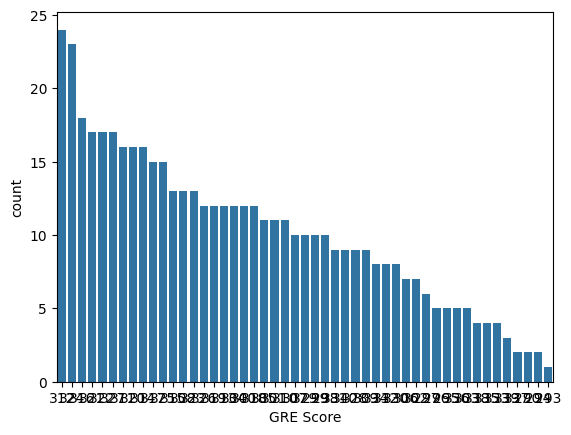

In [ ]:
# Checking the count of GREscore

sns.countplot(data = df,
              x = 'GRE Score',
              order = df['GRE Score'].value_counts().index
              )


<Axes: xlabel='TOEFL Score', ylabel='count'>

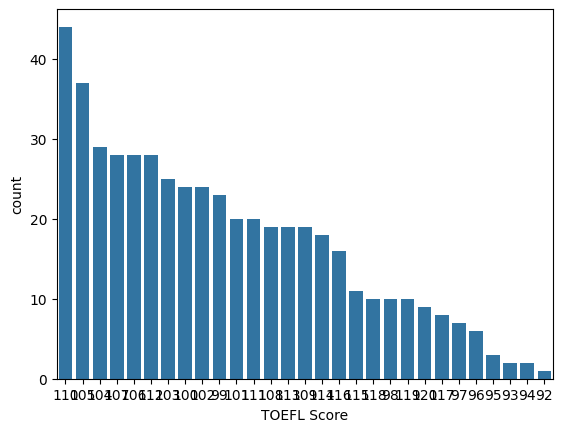

In [ ]:
sns.countplot(data = df,
              x = 'TOEFL Score',
              order = df['TOEFL Score'].value_counts().index
              )

<Axes: xlabel='University Rating', ylabel='count'>

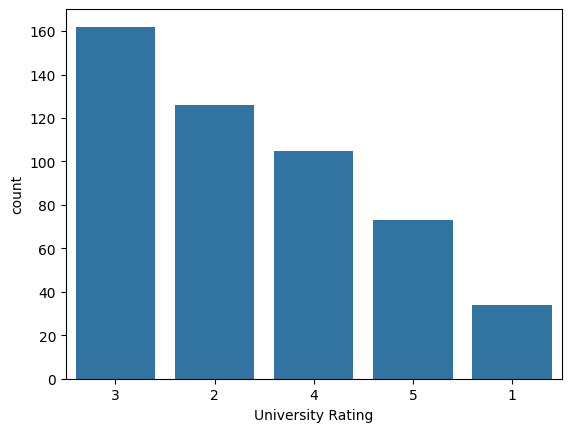

In [ ]:
sns.countplot(data = df,
              x = 'University Rating',
              order = df['University Rating'].value_counts().index
              )

<Axes: xlabel='SOP', ylabel='count'>

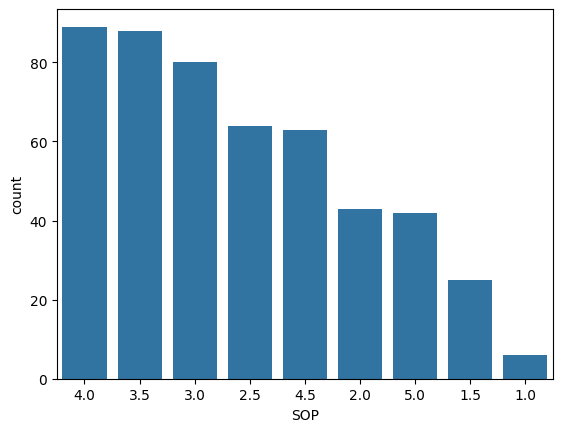

In [ ]:
sns.countplot(data = df,
              x = 'SOP',
              order = df['SOP'].value_counts().index
              )

<Axes: xlabel='LOR ', ylabel='count'>

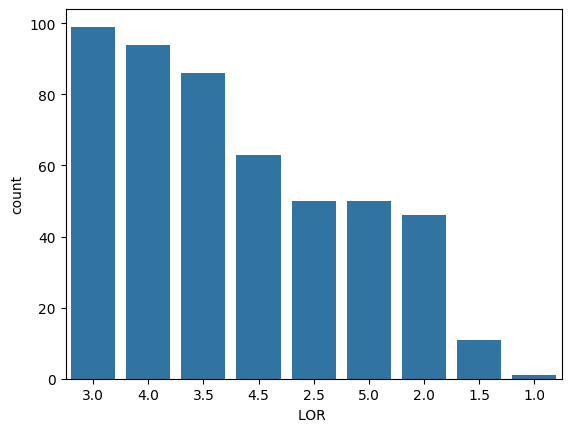

In [ ]:
sns.countplot(data = df,
              x = 'LOR ',
              order = df['LOR '].value_counts().index
              )



<Axes: xlabel='CGPA', ylabel='count'>

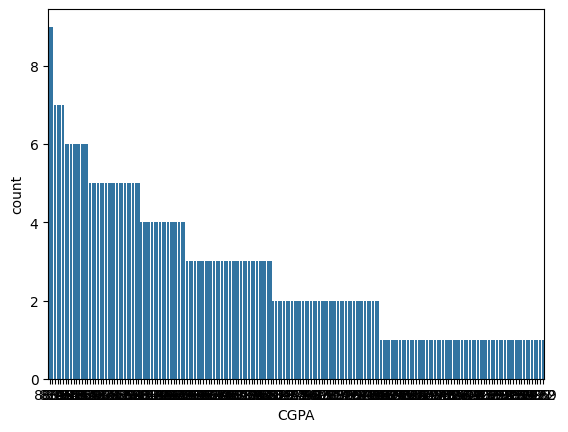

In [ ]:
sns.countplot(data = df,
              x = 'CGPA',
              order = df['CGPA'].value_counts().index
              )

<Axes: xlabel='Research', ylabel='count'>

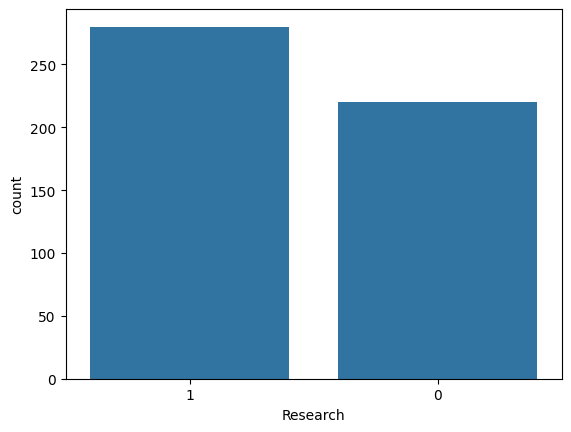

In [ ]:
sns.countplot(data = df,
              x = 'Research',
              order = df['Research'].value_counts().index
              )

NON - GRAPHICAL ANALYSIS

In [ ]:
# Non-Graphical Analysis: Statistical Summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000

BIVARIATE ANALYSIS

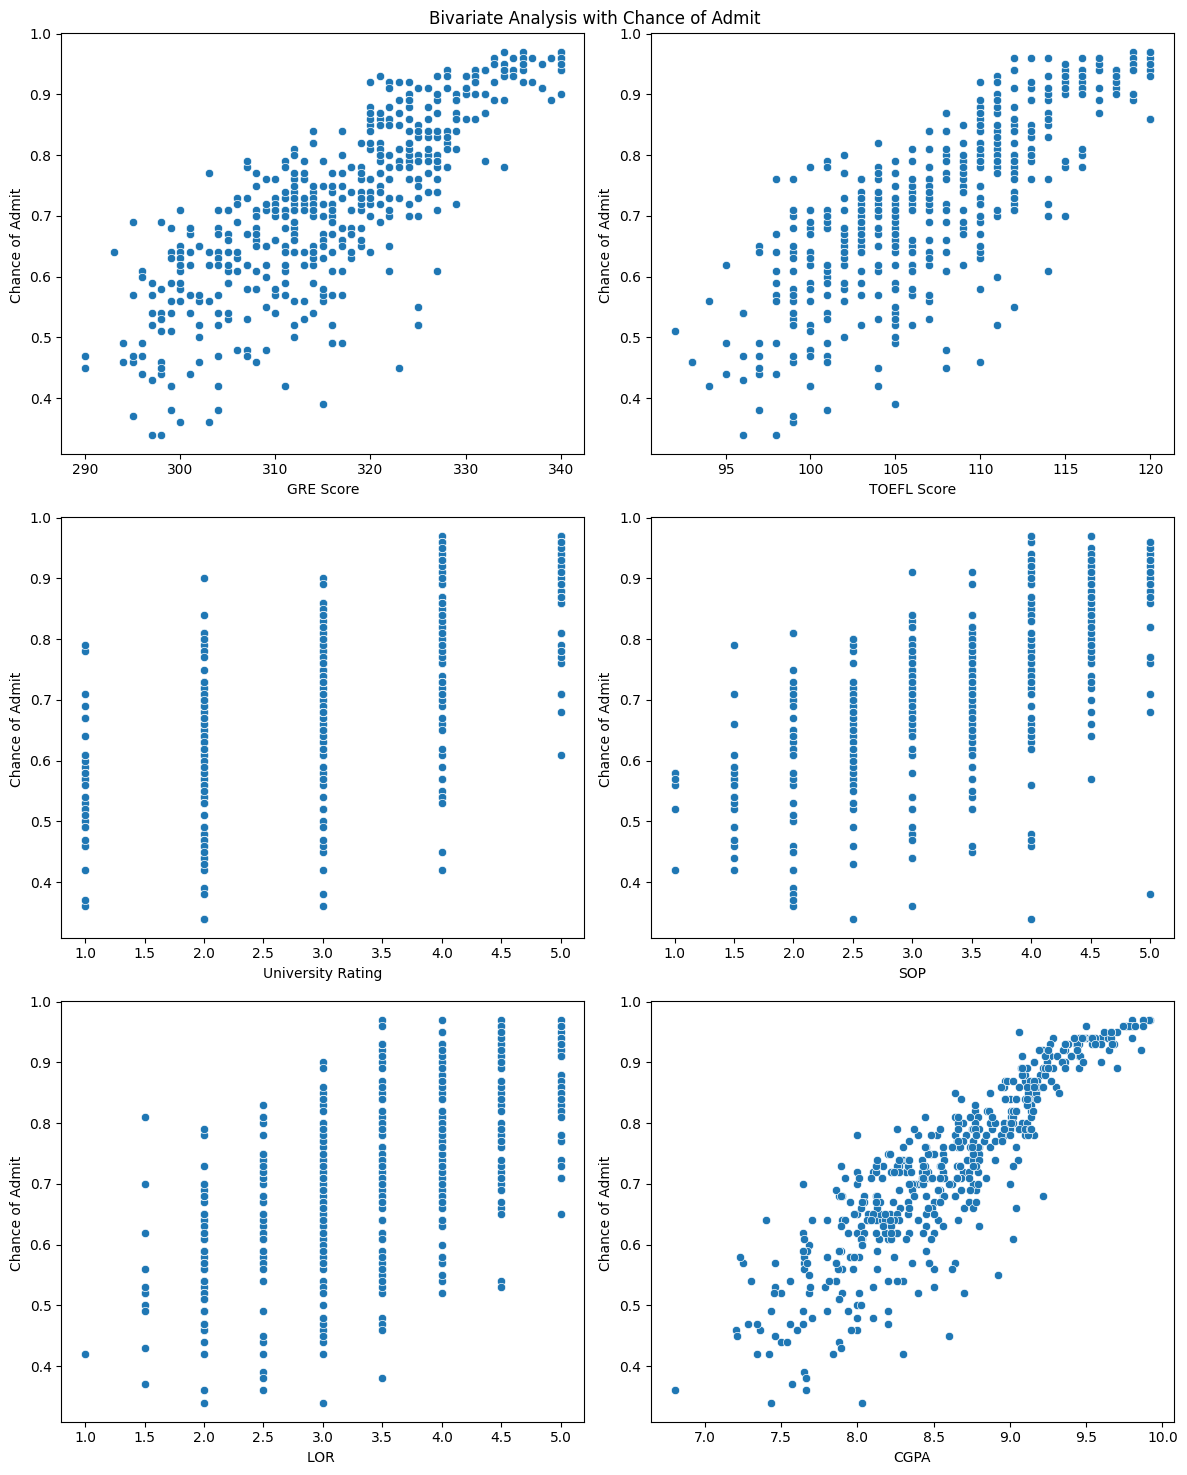

In [ ]:
# Bivariate Analysis - Scatter Plots with 'Chance of Admit'
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.suptitle('Bivariate Analysis with Chance of Admit')

sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=df, ax=axes[0, 0])
sns.scatterplot(x='TOEFL Score', y='Chance of Admit ', data=df, ax=axes[0, 1])
sns.scatterplot(x='University Rating', y='Chance of Admit ', data=df, ax=axes[1, 0])
sns.scatterplot(x='SOP', y='Chance of Admit ', data=df, ax=axes[1, 1])
sns.scatterplot(x='LOR ', y='Chance of Admit ', data=df, ax=axes[2, 0])
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df, ax=axes[2, 1])
plt.tight_layout()
plt.show()

CO RELATION MATRIX

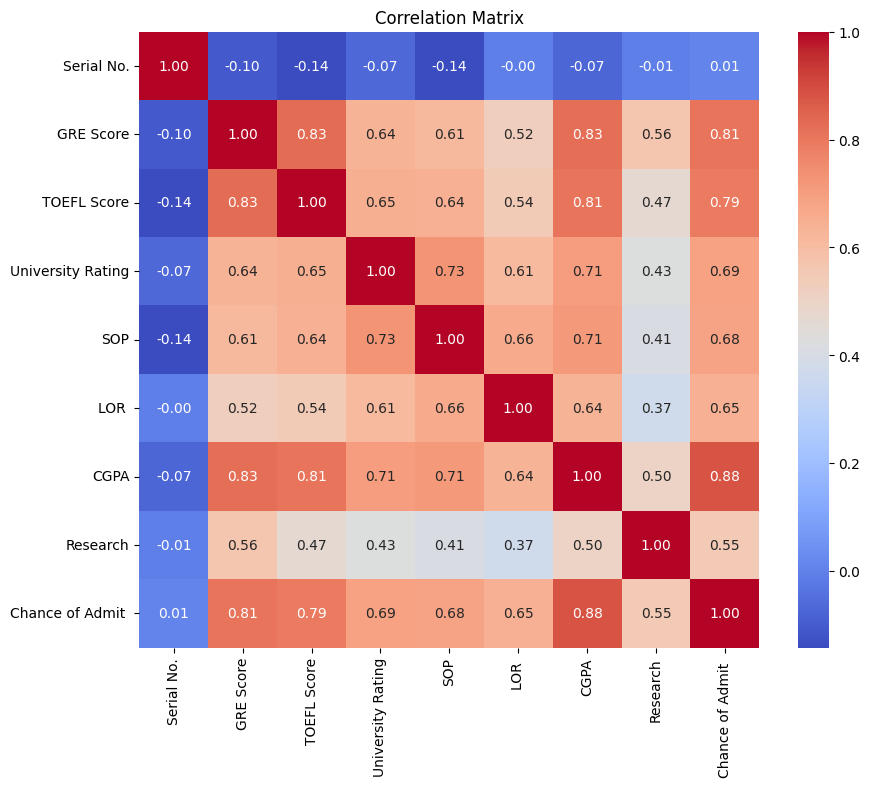

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Normalization/feature scaling
# Normalization/feature scaling is the process of converting the
#                           -data in to the similar range.
#-  It is important while creating the models,
#          because machine gives equal priority to all the columns.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df1.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.000000,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.002004,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.004008,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.006012,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.008016,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


In [ ]:
# ------------------------------------------
# Categorical variable - Research
sns.countplot(x='Research', data=df, ax=axes[2, 1]).set_title('Research Experience Distribution')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
#Insights: Multicollinearity may exist between GRE Score, TOEFL Score, and CGPA#

DATA PREPROCESSING

In [ ]:
# 2.DATA PREPROCESSING AND MODEL BULIDING
# Define Features (x) and target (y)
x = df.drop(columns = ['Chance of Admit '])
y = df['Chance of Admit ']

# Standardize features for better model performance (scalling features)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Splitting the data into train data and test data.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

LINEAR REGRESSION

In [ ]:
#LINEAR REGRESSION MODEL :

# Initialize the Linear Regression model

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Predict on test set
y_pred_linear = linear_model.predict(x_test)

# Model performance evaluation
print("Linear Regression Results")
print("R^2 Score:", r2_score(y_test, y_pred_linear))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))

# Display model coefficients
coefficients = pd.DataFrame(linear_model.coef_, x.columns, columns=['Coefficient'])
print(coefficients)

Linear Regression Results
R^2 Score: 0.8263481396039749
Mean Absolute Error: 0.043258852595452944
Mean Squared Error: 0.003551180545098713
                   Coefficient
Serial No.            0.012901
GRE Score             0.027999
TOEFL Score           0.020872
University Rating     0.003008
SOP                   0.004189
LOR                   0.013825
CGPA                  0.065898
Research              0.011065


RIGID REGRESSION MODEL

In [ ]:
#RIGID REGRESSION MODEL:

# Initialize Ridge Regression with alpha (regularization strength)
ridge_model = Ridge(alpha=1)
ridge_model.fit(x_train, y_train)

# Predict on test set
y_pred_ridge = ridge_model.predict(x_test)

# Ridge model performance
print("Ridge Regression Results")
print("R^2 Score:", r2_score(y_test, y_pred_ridge))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))

Ridge Regression Results
R^2 Score: 0.8262882038945787
Mean Absolute Error: 0.04327340742457695
Mean Squared Error: 0.0035524062303558678


LASSO REGRESSION MODEL

In [ ]:
# LASSO REGRESSION MODEL:

# Initialize Lasso Regression with alpha
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

# Predict on test set
y_pred_lasso = lasso_model.predict(x_test)

# Lasso model performance
print("Lasso Regression Results")
print("R^2 Score:", r2_score(y_test, y_pred_lasso))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression Results
R^2 Score: 0.2606300776476902
Mean Absolute Error: 0.09858647394745274
Mean Squared Error: 0.015120114912104738
